In [ ]:
import pandas as pd # importing pandas for data manupilation
import numpy as np # importing numpy for numerical operations
import plotly.express as px # importing plotly Express for interactive visualization
import plotly.graph_objects as go # importing plotly graph objects for advanced visualizations
import bokeh.plotting as bp # importing  bokeh for web-based interactive visualizations
import altair as alt # importing altair for declarative data visualization
import seaborn as sns # importing seaborn for statistical data visualization
import matplotlib.pyplot as plt # importing matplotlib for standard plottimg
from scipy import stats # importing skippy for statistical analysis
from statsmodels.tsa.arima.model import ARIMA # importing ARIMA model for time series forecasting
import geopandas as gpd # importing geopandas for handling spatial data
import folium # importing folium for interactive map visualizations

In [ ]:
# introduction to EDA
# loading a sample dataset
df = pd.read_csv("/content/diabetes.csv")

In [ ]:
#1.3.1 understanding data structure
print(df.head()) # displaying the first five rows of the dataset
print(df.info()) # displaying dataset structure and data types

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [ ]:
# 1.3.2 handling missing data
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# 1.3.3 # calculating summary statistics
print(df.describe()) # generating statistics such as mean,std,min,max,etc

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

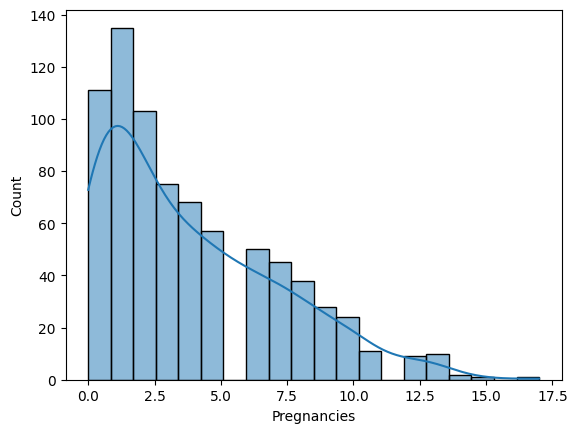

In [ ]:
# 1.3.4 #  data visualization basics
sns.histplot(df['Pregnancies'],bins=20, kde=True) # creating a histogram with kernel density estimate
plt.show() # displaying the plot

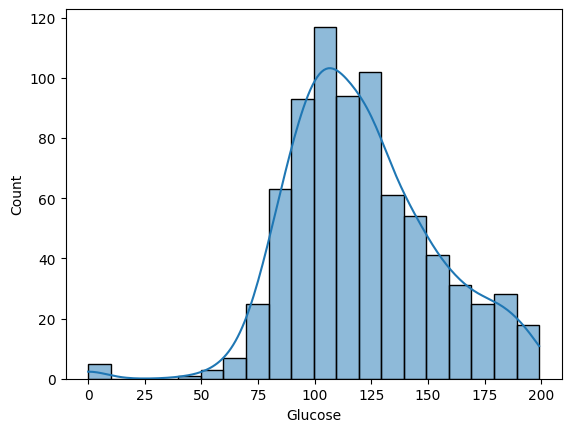

In [ ]:
# 1.3.4.1 #  data visualization basics
sns.histplot(df['Glucose'],bins=20, kde=True) # creating a histogram with kernel density estimate
plt.show() # displaying the plot

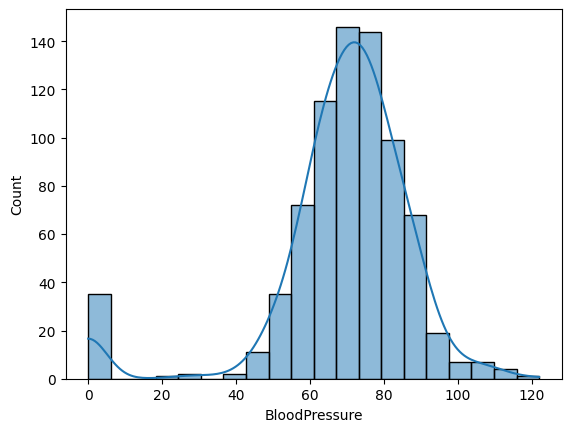

In [ ]:
# 1.3.4.2 #  data visualization basics
sns.histplot(df['BloodPressure'],bins=20, kde=True) # creating a histogram with kernel density estimate
plt.show() # displaying the plot

In [ ]:
# 2. Advanced Data Visualization
# 2.1.2 Creating Interactive Charts with Plotly
fig = px.scatter(df,x='Pregnancies',y='Glucose',color='BloodPressure',title='Pregnancies vs Glucose')  # Creating an interactive scatter plot
fig.show() # Displaying the scatter plot

In [ ]:
# 2.1 Advanced Data Visualization
# 2.1.2 Creating Interactive Charts with Plotly
fig = px.scatter(df,x='Pregnancies',y='Glucose',color='BloodPressure',title='Pregnancies vs BloodPressure')  # Creating an interactive scatter plot
fig.show() # Displaying the scatter plot

In [ ]:
fig = px.bar(df,x='BMI',y='Pregnancies',color='Glucose',title='BMI during Pregnancies') # creating an interactive bar chart
fig.show() # Displaying the bar chart

In [ ]:
fig = px.line(df.groupby('BMI')['Pregnancies'].mean().reset_index(),x='BMI',y='Pregnancies',title='Avg BMI per Pregnancies') # creating an interactive line chart
fig.show() # Displaying the line chart

In [ ]:
# 3 Statistical Methods for EDA
# 3.1 Key Statistics
print("mean:",df['Pregnancies'].mean()) # calculating and printing the mean of 'Pregnancies'
print("variance:",df['Pregnancies'].var()) # calculating and printing the variance of 'Pregnancies'
print("correlation matrix:\n",df.select_dtypes(include=[np.number]).corr()) # filtering only numeric clumns

mean: 3.8450520833333335
variance: 11.35405632062142
correlation matrix:
                           Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017

In [ ]:
# 3.2 Hypothesis testing
t_stat,p_value,=stats.ttest_ind(df['Age'],df['BloodPressure']) # performing a t-test to compare means between Age and BloodPressure
print(f"t-test p-value:{p_value}") # printing the p-value from t-test

t-test p-value:3.2299259167868434e-273


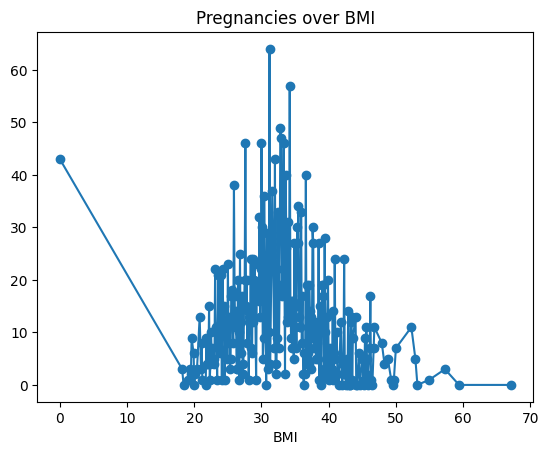

In [ ]:
# 4. Time series and data analysis
# 4.1 time series analysis
ts_data=df.groupby('BMI')['Pregnancies'].sum() # aggregating Pregnancies amount over BMI
ts_data.plot(title='Pregnancies over BMI',marker='o') # plotting Pregnancies amount over BMI
plt.show() # displaying the time series plot

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
# Step 1: create a sample data set
np.random.seed(42)
data={
    'Group':np.random.choice(['A','B','C'],size=300),
    'Pregnancies':np.random.normal(50,10,300), # Normal distribution
    'Glucose':np.random.normal(55,15,300),
    'Category1':np.random.choice(['Yes','No'],size =300),
    'Category2':np.random.choice(['High','Medium','Low'],size=300)
}
df=pd.DataFrame(data)

In [ ]:
# Step 3: Hypothesis Testing
# 1. T-Test Comparing means of two groups (Feauture1 in Group A vs Group B)
group_A=df[df['Group']=='A']['Pregnancies']
group_B=df[df['Group']=='B']['Glucose']
t_stat,p_val,=stats.ttest_ind(group_A,group_B)
print(f"T-Test Result:t-stat+{t_stat:3f},p-value={p_val:3f}")

T-Test Result:t-stat+-3.863612,p-value=0.000153


In [ ]:
# 3. Chi-Square Test: Relationship between two categorical variables
contingency_table=pd.crosstab(df['Pregnancies'],df['Glucose'])
chi2_stat,chi2_p,_,_=stats.chi2_contingency(contingency_table)
print(f"Chi-Square Teat:chi2-stat={chi2_stat:.3f},p-value={chi2_p:.3f}")

Chi-Square Teat:chi2-stat=89700.000,p-value=0.240


In [ ]:
# 4. Kolomogorov-Smirnov Test: Check if Feature1 folllows a normal distribution
ks_stat,ks_p=stats.kstest(df['Pregnancies'],'norm',args=(df['Pregnancies'].mean(),df['Pregnancies'].std()))
print(f"Kolomogorov-Smirnow Test:KS-stat={ks_stat:.3f},p-value{chi2_p:.3f}")

Kolomogorov-Smirnow Test:KS-stat=0.040,p-value0.240


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Exploratory Data Ananlysis
print("Dataset Overview:\n",df.head())
print("\nSummary Statistics:\n",df.describe())
print("\nMissing Values:\n",df.isnull().sum())

Dataset Overview:
   Group  Pregnancies    Glucose Category1 Category2
0     C    51.506590  63.403386       Yes       Low
1     A    49.842851  41.318076       Yes       Low
2     C    36.699259  69.956728       Yes    Medium
3     C    49.747124  51.470219        No      High
4     A    63.431682  62.016693       Yes      High

Summary Statistics:
        Pregnancies     Glucose
count   300.000000  300.000000
mean     50.062813   56.264527
std      10.447686   16.420358
min      15.218308    1.476921
25%      43.198666   45.635027
50%      49.794987   56.774846
75%      56.023228   66.595812
max      82.539851  102.616632

Missing Values:
 Group          0
Pregnancies    0
Glucose        0
Category1      0
Category2      0
dtype: int64


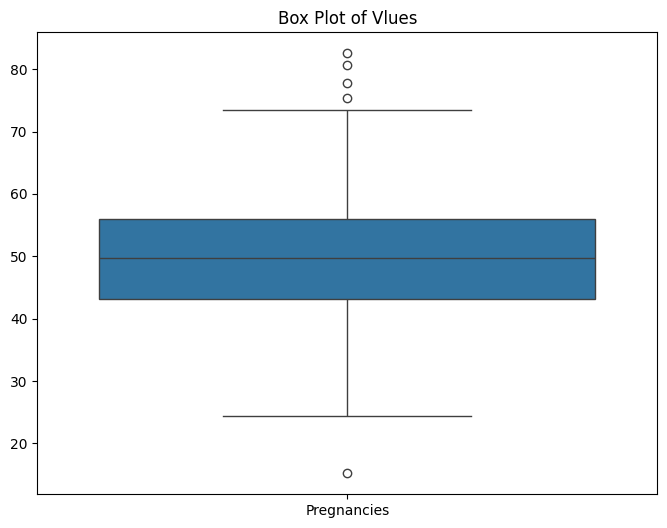

In [ ]:
# Box PLOT
plt.figure(figsize=(8,6))
sns.boxplot(data=df[['Pregnancies']])
plt.title("Box Plot of Vlues")
plt.show()

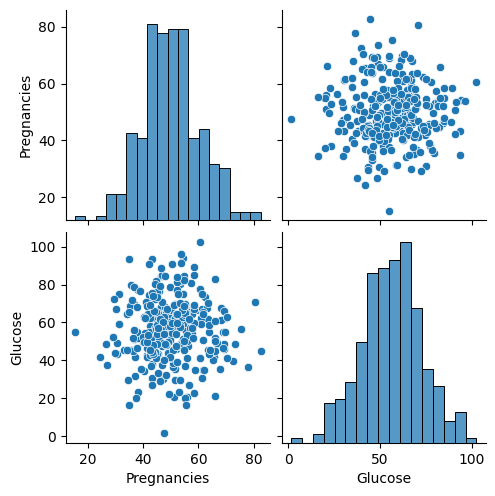

In [ ]:
# Pair Plot
sns.pairplot(df)
plt.show()